In [1]:
from nanonets import NANONETSOCR
model = NANONETSOCR()


In [2]:
import json
from nanonets import NANONETSOCR

# Initialize the NANONETSOCR model
model = NANONETSOCR()
model.set_token('2753432c-cdee-11ee-99f3-f24f5dec9ef9')

# Define the path to the jpg image
image_path = 'files/frienen_01_01.jpg'

# prediction_json = model.convert_to_prediction(image_path)
# print(json.dumps(prediction_json, indent=2))

# string = model.convert_to_string(image_path,formatting='lines and spaces') 
# print(string)

model.convert_to_txt(image_path, output_file_name = 'OUTPUT_girls.txt')

boxes = model.convert_to_boxes(image_path)


for box in boxes:
  print(box)



KeyboardInterrupt: 

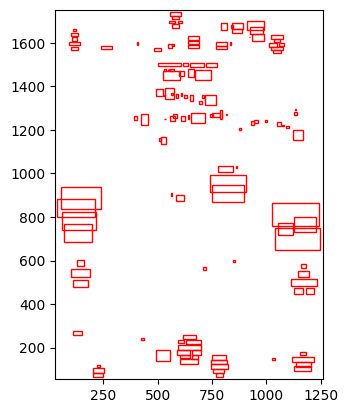

In [ ]:
import matplotlib.pyplot as plt

def plot_rectangles(xmin, xmax, ymin, ymax):
    fig, ax = plt.subplots()
    
    for i in range(len(xmin)):
        rect = plt.Rectangle((xmin[i], ymin[i]), xmax[i] - xmin[i], ymax[i] - ymin[i], 
                             edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    ax.set_xlim(min(xmin) - 10, max(xmax) + 10)
    ax.set_ylim(min(ymin) - 10, max(ymax) + 10)
    ax.set_aspect('equal')
    plt.show()


xmin = [box['xmin'] for box in boxes]
xmax = [box['xmax'] for box in boxes]
ymin = [box['ymin'] for box in boxes]
ymax = [box['ymax'] for box in boxes]

plot_rectangles(xmin, xmax, ymin, ymax)

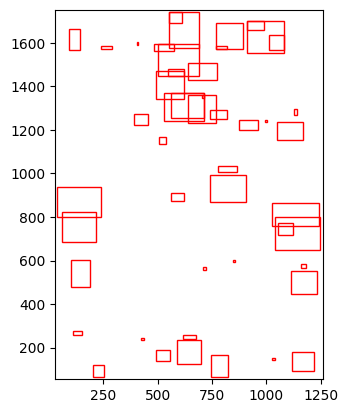

In [ ]:
def merge_boxes(boxes, threshold):
    merged_boxes = []
    merged = False
    
    for box in boxes:
        if not merged_boxes:
            merged_boxes.append(box)
        else:
            for merged_box in merged_boxes:
                if (abs(box['xmin'] - merged_box['xmin']) <= threshold and
                    abs(box['ymin'] - merged_box['ymin']) <= threshold and
                    abs(box['xmax'] - merged_box['xmax']) <= threshold and
                    abs(box['ymax'] - merged_box['ymax']) <= threshold):
                    
                    merged_box['text'] = merged_box['text'] + ' ' + box['text']
                    merged_box['xmin'] = min(box['xmin'], merged_box['xmin'])
                    merged_box['ymin'] = min(box['ymin'], merged_box['ymin'])
                    merged_box['xmax'] = max(box['xmax'], merged_box['xmax'])
                    merged_box['ymax'] = max(box['ymax'], merged_box['ymax'])
                    merged = True
                    break
            
            if not merged:
                merged_boxes.append(box)
        
        merged = False
    
    return merged_boxes

threshold = 100
for i in range(5):
    merged_boxes = merge_boxes(boxes, threshold)
plot_rectangles([box['xmin'] for box in merged_boxes], [box['xmax'] for box in merged_boxes], [box['ymin'] for box in merged_boxes], [box['ymax'] for box in merged_boxes])